<a href="https://colab.research.google.com/github/keshavTUM/DEMO_BuildingClassification/blob/main/WorkingFULLimageRetrieval_UsingGrounding_dino_and_sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Automated Dataset Generation with Grounding DINO + Segment Anything Model (SAM)

---

In this tutorial, you will learn how to automatically annotate your images using two groundbreaking models - [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) and [Segment Anything Model (SAM)](https://github.com/facebookresearch/segment-anything). You can then use this dataset to train a real-time object detection or instance segmentation model. Annotation of images using polygons in the traditional way is extremely time-consuming and expensive. With Grounding DINO and SAM, initial annotation takes only a few minutes and your work is reduced to manual verification of obtained labels.

![auto-annotation-with-grounded-sam](https://media.roboflow.com/notebooks/examples/auto-annotation-with-grounded-sam.png)

*Figure showing the effects of automatic annotation. The raw image on the left; Object detection annotations obtained with Grounding DINO in the middle; Instance segmentation annotations obtained with Grounding DINO + SAM on the right.*

## Complementary Materials

---

Want to learn more? 🤓 We have prepared separate tutorials where you can learn how to use Grounding DINO and Segment Anything Model (SAM). You will find all the necessary links below.

- Segment Anything Model

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/facebookresearch/segment-anything) [![arXiv](https://img.shields.io/badge/arXiv-2304.02643-b31b1b.svg)](https://arxiv.org/abs/2304.02643) [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-segment-anything-with-sam.ipynb) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/D-D6ZmadzPE) [![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-use-segment-anything-model-sam)

- Grounding DINO

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO) [![arXiv](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/abs/2303.05499) [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/cMa77r3YrDk) [![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/grounding-dino-zero-shot-object-detection)

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install Grounding DINO and Segment Anything Model
- Load models
- Download Example Data
- Single Image Mask Auto Annotation
- Full Dataset Mask Auto Annotation
- Convert Object Detection to Instance Segmentation Dataset

## Let's begin! 🔥

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
# Check current PyTorch version
import torch
print(torch.__version__)


2.6.0+cu124


In [2]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [3]:
!pip install torch==2.5.1
!pip install torchvision==0.20.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 852.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 72.0 MB/s eta 0:00:00


In [4]:
import sdfhdsjk  #restart runtime

ModuleNotFoundError: No module named 'sdfhdsjk'

In [39]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# Check current PyTorch version
import torch
print(torch.__version__)


2.5.1+cu124


In [3]:
!nvidia-smi

Tue Apr  8 21:36:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [4]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install Grounding DINO and Segment Anything Model

Our project will use two groundbreaking designs - [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) - for zero-shot detection and [Segment Anything Model (SAM)](https://github.com/facebookresearch/segment-anything) - for converting boxes into segmentations. We have to install them first.


In [5]:
# prompt: delete this folder if already exist  %cd {HOME}/GroundingDINO

import os
import shutil

HOME = os.getcwd()
grounding_dino_path = os.path.join(HOME, "GroundingDINO")

if os.path.exists(grounding_dino_path):
  shutil.rmtree(grounding_dino_path)
  print(f"Folder '{grounding_dino_path}' deleted successfully.")
else:
  print(f"Folder '{grounding_dino_path}' does not exist.")


Folder '/content/GroundingDINO' does not exist.


In [6]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 463 (delta 175), reused 136 (delta 136), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 39.46 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 9.8 MB/s eta 0:00:00


In [7]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-jjwfb8ra
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-jjwfb8ra
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=d5bb4f7e478696505ed067b94d35b9d49df551e82e2d0bfc3c40de0bd68beff3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ka3a_fgw/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


**NOTE:** To glue all the elements of our demo together we will use the [`supervision`](https://github.com/roboflow/supervision) pip package, which will help us **process, filter and visualize our detections as well as to save our dataset**. A lower version of the `supervision` was installed with Grounding DINO. However, in this demo we need the functionality introduced in the latest versions. Therefore, we uninstall the current `supervsion` version and install version `0.6.0`.



In [8]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


**NOTE:** At the end of the tutorial we will upload our annotations to [Roboflow](roboflow.com). To automate this process with the API, let's install the `roboflow` pip package.

In [9]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.1 MB/s eta 0:00:00


### Download Grounding DINO Model Weights

To run Grounding DINO we need two files - configuration and model weights. The configuration file is part of the [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) repository, which we have already cloned. The weights file, on the other hand, we need to download. We write the paths to both files to the `GROUNDING_DINO_CONFIG_PATH` and `GROUNDING_DINO_CHECKPOINT_PATH` variables and verify if the paths are correct and the files exist on disk.

In [10]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [11]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [12]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


### Download Segment Anything Model (SAM) Weights

As with Grounding DINO, in order to run SAM we need a weights file, which we must first download. We write the path to local weight file to `SAM_CHECKPOINT_PATH` variable and verify if the path is correct and the file exist on disk.

In [13]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [14]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Load models

In [15]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Grounding DINO Model

In [16]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/GroundingDINO/groundingdino/util/inference.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location="cpu")


### Load Segment Anything Model (SAM)

In [17]:
%cd {HOME}/weights
!rm sam_vit_h_4b8939.pth # Delete the existing file
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth # Re-download the file

/content/weights


In [18]:
SAM_ENCODER_VERSION = "vit_h"

In [19]:
!ls -l {HOME}/weights/sam_vit_h_4b8939.pth # Check the file size

-rw-r--r-- 1 root root 2564550879 Apr  4  2023 /content/weights/sam_vit_h_4b8939.pth


In [20]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


## Download Example Data

Let's download few example images. Feel free to replace my images with yours. All you have to do is upload them to the `{HOME}/data` directory. If you're looking for data, take a peek at [Roboflow Universe](https://universe.roboflow.com/)! You're sure to find something interesting.

In [21]:
f"{HOME}/data"

'/content/data'

In [22]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data


!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg


/content
/content/data


## Single Image Mask Auto Annotation

Before we automatically annotate the entire dataset let's focus for a moment on a single image.

In [23]:
SOURCE_IMAGE_PATH = f"{HOME}/data/dog-3.jpeg"
CLASSES = ['car', 'dog', 'person', 'nose', 'chair', 'shoe', 'ear']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [23]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [46]:
SOURCE_IMAGE_PATH = f"{HOME}/drive/MyDrive/DATASETS/QueryPic/querypic.jpg"
#/content/drive/MyDrive/DATASETS/QueryPic/Query.jpg
CLASSES = ['buildings']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

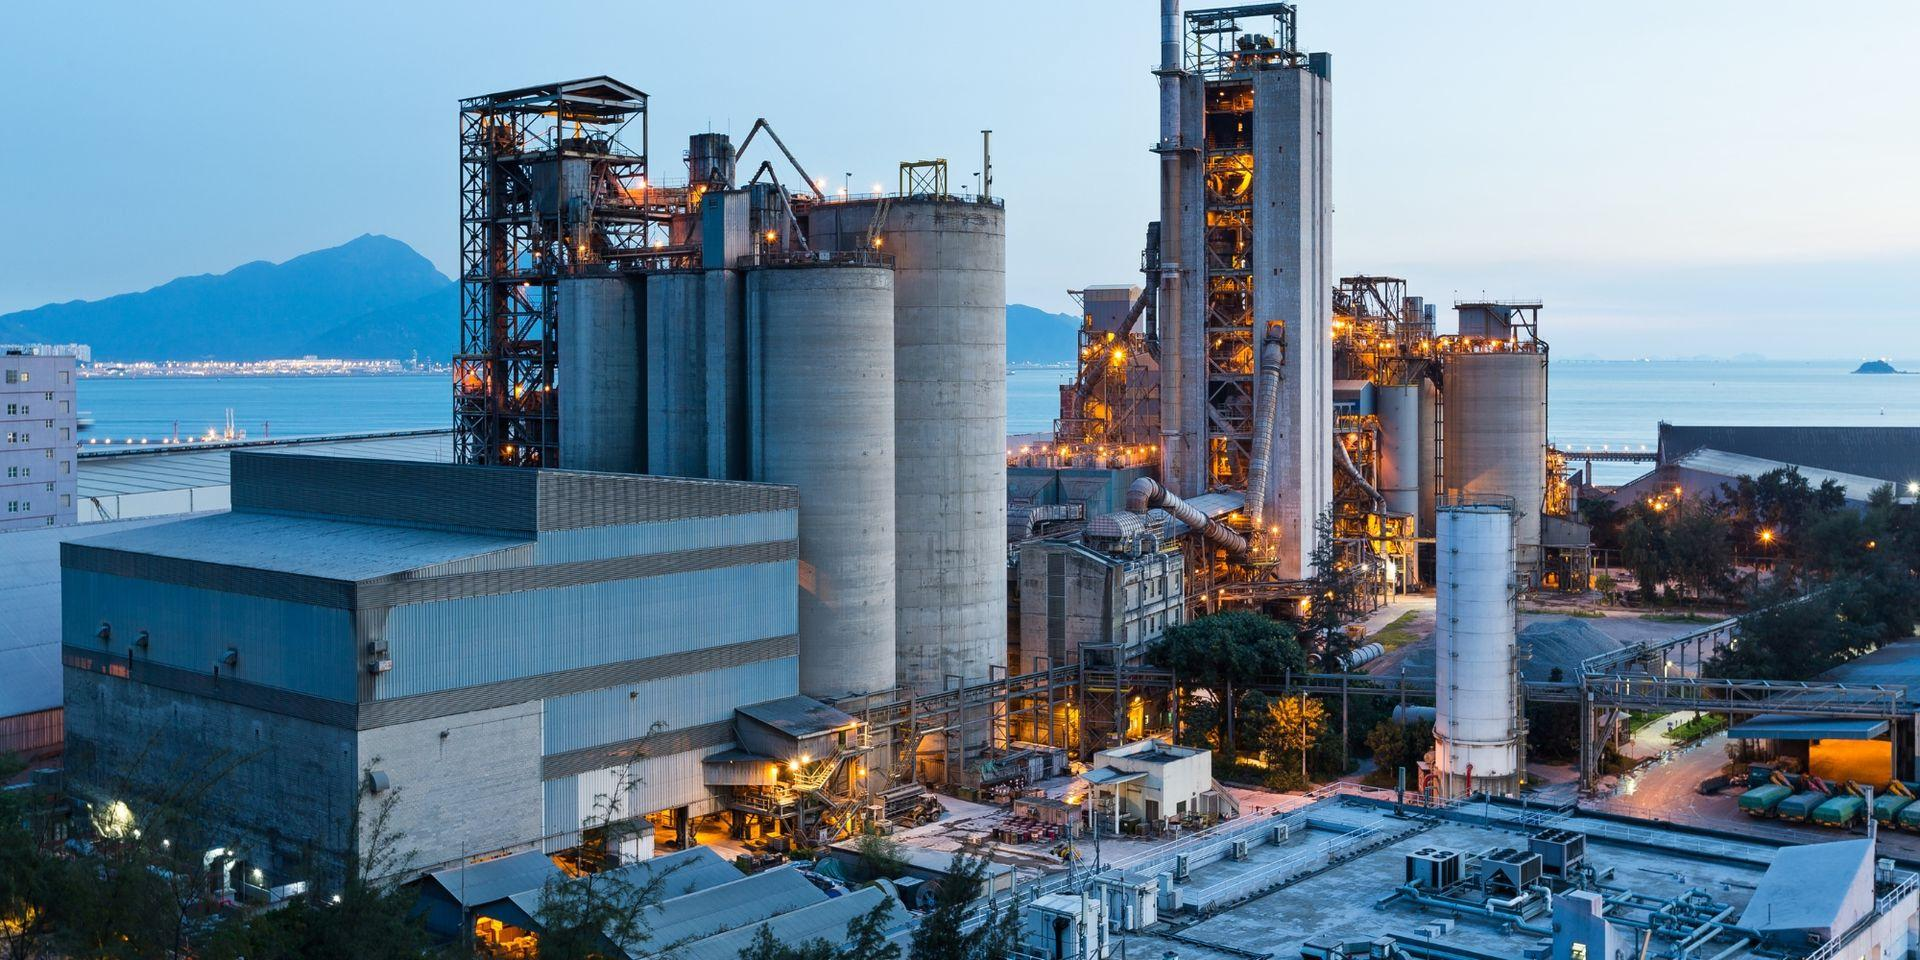

In [47]:
# prompt: dislay this image

from IPython.display import Image
Image(filename=SOURCE_IMAGE_PATH)


### Zero-Shot Object Detection with Grounding DINO

**NOTE:** To get better Grounding DINO detection we will leverage a bit of prompt engineering using `enhance_class_name` function defined below. 👇 You can learn more from our [Grounding DINO tutorial](https://blog.roboflow.com/grounding-dino-zero-shot-object-detection/).

In [48]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1589: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/content/GroundingDINO/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

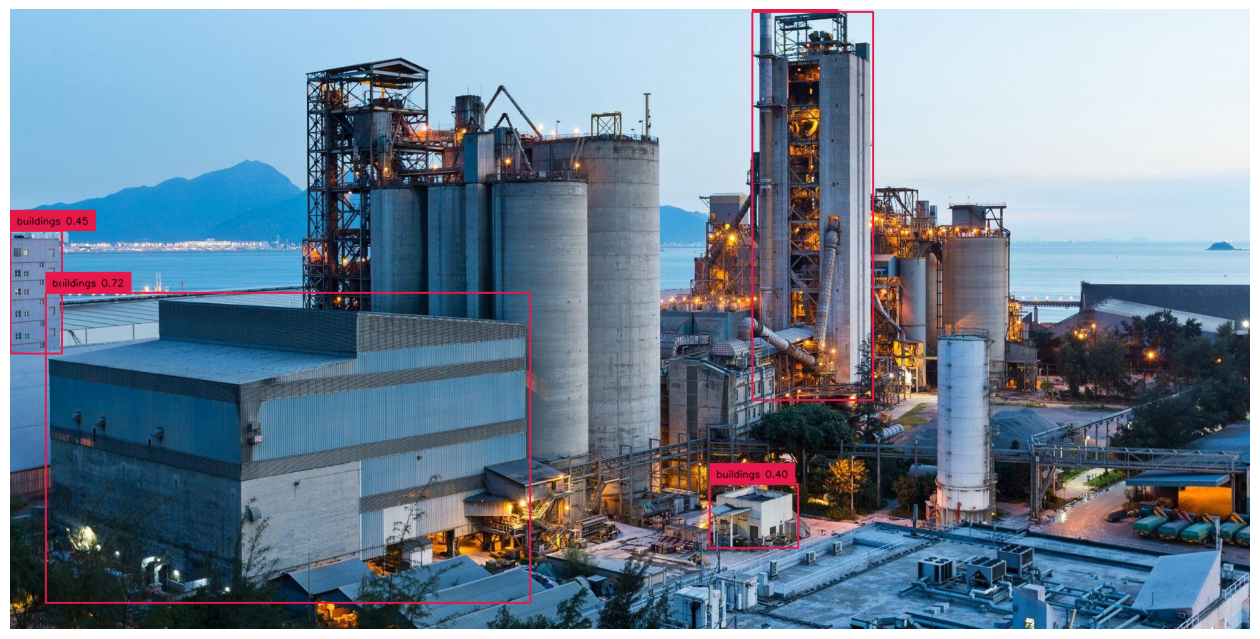

In [49]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

### Prompting SAM with detected boxes

In [50]:
import numpy as np
from segment_anything import SamPredictor


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

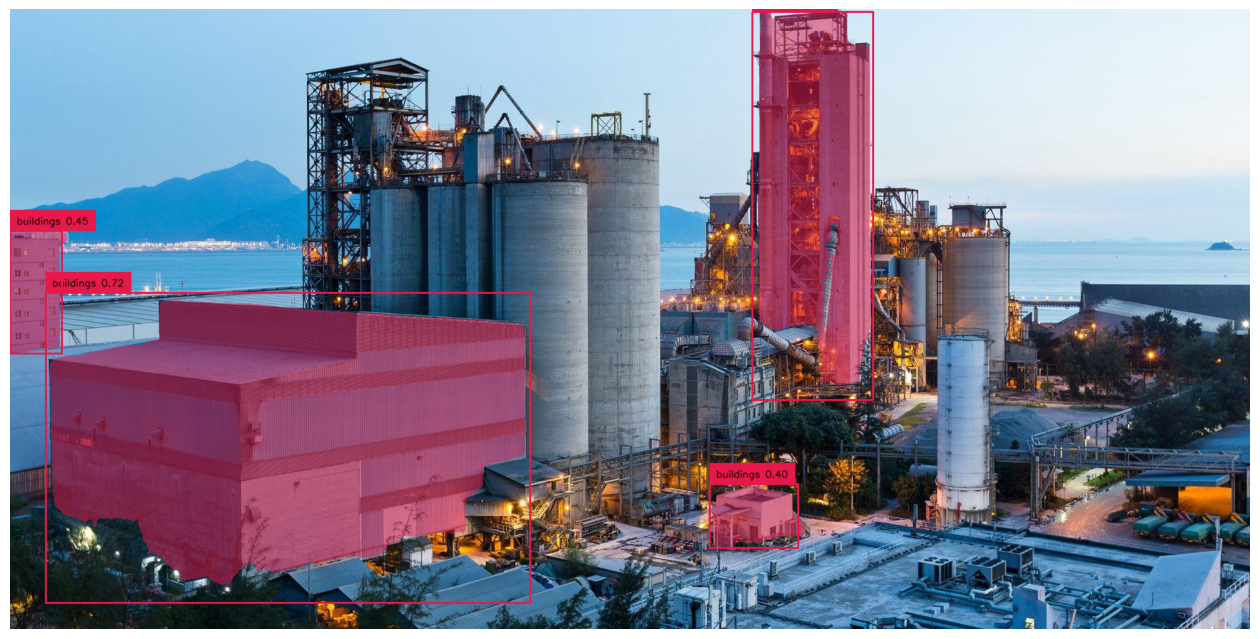

In [51]:
import cv2

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

In [52]:
'''import math

grid_size_dimension = math.ceil(math.sqrt(len(detections.mask)))

titles = [
    CLASSES[class_id]
    for class_id
    in detections.class_id
]

sv.plot_images_grid(
    images=detections.mask,
    titles=titles,
    grid_size=(grid_size_dimension, grid_size_dimension),
    size=(16, 16)
)'''

'import math\n\ngrid_size_dimension = math.ceil(math.sqrt(len(detections.mask)))\n\ntitles = [\n    CLASSES[class_id]\n    for class_id\n    in detections.class_id\n]\n\nsv.plot_images_grid(\n    images=detections.mask,\n    titles=titles,\n    grid_size=(grid_size_dimension, grid_size_dimension),\n    size=(16, 16)\n)'

Full Dataset Mask Auto Annotation



In [53]:
import tobreakcode , if u want to create mask on all datset then run this below code or else for the query image mask, scroll down below

SyntaxError: invalid syntax (<ipython-input-53-781150c37758>, line 1)

In [ ]:
#for DATASETS
import os
import cv2
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
#from typing import List # Assuming you defined List earlier
#from groundingdino.util.inference import Model  # Assuming you loaded the model earlier
#from segment_anything import sam_model_registry, SamPredictor # Assuming you loaded SAM earlier

# Initialize images and annotations dictionaries before the loop
images = {}
annotations = {}
# ... (Paths, parameters, and model loading from previous cells) ...
# Directories and thresholds
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/Building_labeled_train_data'
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
CLASSES = ['buildings']
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25
BATCH_SIZE = 500  # Number of images per batch

# Create save directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Track processed images
processed_images = set()
processed_images_file = 'processed_images.txt'
if os.path.exists(processed_images_file):
    with open(processed_images_file, 'r') as f:
        processed_images = set(f.read().splitlines())

# Function to list files with specific extensions in a directory and its subdirectories
def list_files_with_extensions(directory, extensions):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(tuple(extensions)):
                file_paths.append(os.path.join(root, file))
    return file_paths

image_paths = list_files_with_extensions(IMAGES_DIRECTORY, IMAGES_EXTENSIONS)
print(f"Found {len(image_paths)} images.")

# Batch processing
total_images = len(image_paths)
for batch_start in range(0, total_images, BATCH_SIZE):
    batch_paths = image_paths[batch_start:batch_start + BATCH_SIZE]
    print(f"Processing batch {batch_start // BATCH_SIZE + 1}/{(total_images // BATCH_SIZE) + 1}")

    for image_path in tqdm(batch_paths):
        image_name = os.path.basename(image_path)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Extract class from folder name
        usage_type = os.path.basename(os.path.dirname(image_path))

        detections = grounding_dino_model.predict_with_classes(
            image=image,
            classes=CLASSES,
            box_threshold=BOX_THRESHOLD,
            text_threshold=TEXT_THRESHOLD
        )

        if detections is not None and len(detections) > 0:
            detections = detections[detections.class_id != None]
            detections.mask = segment(
                sam_predictor=sam_predictor,
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                xyxy=detections.xyxy
            )

            images[image_name] = image
            annotations[image_name] = detections

            # Draw bounding boxes and apply translucent segmentation masks
            for i, box in enumerate(detections.xyxy):
                x_min, y_min, x_max, y_max = map(int, box)
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green bounding box

                # Add confidence score text on the bounding box
                confidence_score = detections.confidence[i]
                cv2.putText(image, f"{confidence_score:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

                # Create a translucent mask overlay (0.4 opacity)
                mask = detections.mask[i].astype(np.uint8) * 255
                mask_colored = np.zeros_like(image, dtype=np.uint8)
                mask_colored[mask > 0] = (0, 255, 0)  # Green color for mask
                image = cv2.addWeighted(image, 0.6, mask_colored, 0.4, 0)  # Blend image and mask

            # Save the annotated image
            save_path = os.path.join(SAVE_DIR, f"annotated_{image_name}")
            cv2.imwrite(save_path, image)

            # Save labels as CSV with confidence scores
            detections_df = pd.DataFrame({
                'x_min': detections.xyxy[:, 0],
                'y_min': detections.xyxy[:, 1],
                'x_max': detections.xyxy[:, 2],
                'y_max': detections.xyxy[:, 3],
                'confidence': detections.confidence,  # Ensure confidence scores are saved
                'class_id': detections.class_id,
                'usage_type': usage_type
            })
            label_save_path = os.path.join(SAVE_DIR, f"labels_{image_name}.csv")
            detections_df.to_csv(label_save_path, index=False)

    print(f"Batch {batch_start // BATCH_SIZE + 1} completed.")

print("Annotation completed for all batches!")




In [ ]:
# prompt: my annotations are saved now, so can u just please display one random annotated pic and its csv details

import os
import random
import pandas as pd
from IPython.display import Image, display

# Assuming your annotated images and CSVs are saved in SAVE_DIR
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'

# Get a list of image files
image_files = [f for f in os.listdir(SAVE_DIR) if f.startswith('annotated_') and f.endswith(('.jpg', '.jpeg', '.png'))]

if image_files:
  # Select a random image file
  random_image_file = random.choice(image_files)
  image_path = os.path.join(SAVE_DIR, random_image_file)

  # Display the image
  display(Image(filename=image_path))

  # Find the corresponding CSV file
  csv_filename = random_image_file.replace('annotated_', 'labels_').replace('.jpg', '.csv').replace('.jpeg', '.csv').replace('.png', '.csv')
  csv_path = os.path.join(SAVE_DIR, csv_filename)

  if os.path.exists(csv_path):
    # Display the CSV details
    df = pd.read_csv(csv_path)
    display(df)
  else:
    print(f"CSV file not found for {random_image_file}")
else:
  print("No annotated images found in the directory.")


In [ ]:
'''import os
import cv2
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Directories and thresholds
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/Building_labeled_train_data'
LABELS_FILE = '/content/drive/MyDrive/DATASETS/labeled_data_all.csv'
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
CLASSES = ['buildings']
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25'''



```
# This is formatted as code
```

### Extract labels from images

In [ ]:
'''IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/Building_labeled_train_data'
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
CLASSES = ['buildings']
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25
BATCH_SIZE = 500  # Number of images per batch


# Create save directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Load labels
#labels_df = pd.read_csv(LABELS_FILE)

# Extract labels from images
images = {}
annotations = {}

# Function to list files with specific extensions in a directory and its subdirectories
def list_files_with_extensions(directory, extensions):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(tuple(extensions)):
                file_paths.append(os.path.join(root, file))
    return file_paths

image_paths = list_files_with_extensions(
    directory=IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

print(f"Found {len(image_paths)} images.")
print("Image paths:", image_paths)

for image_path in tqdm(image_paths):
    image_name = os.path.basename(image_path)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_THRESHOLD,
        text_threshold=TEXT_THRESHOLD
    )

    # Debugging: Print detections
    print(f"Detections for {image_name}: {detections}")

    if detections is not None and len(detections) > 0:
        detections = detections[detections.class_id != None]
        detections.mask = segment(
            sam_predictor=sam_predictor,
            image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
            xyxy=detections.xyxy
        )
        images[image_name] = image
        annotations[image_name] = detections
    else:
        print(f"No valid detections for {image_name}")

plot_images = []
plot_titles = []

box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

for image_name, detections in annotations.items():
    image = images[image_name]
    plot_images.append(image)
    plot_titles.append(image_name)

    labels = [
        f"{CLASSES[class_id]} {confidence:0.2f}"
        for _, _, confidence, class_id, _
        in detections]
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
    plot_images.append(annotated_image)
    title = " ".join(set([
        CLASSES[class_id]
        for class_id
        in detections.class_id
    ]))
    plot_titles.append(title)

    # Extract usage_type and arch_style labels
    base_name = image_name.replace('annotated_', '')
    image_path = os.path.join(IMAGES_DIRECTORY, base_name)
    #label_row = labels_df[labels_df['image_path'] == image_path]

    # Debugging: Print extracted labels
    print(f"Image: {image_name}, Image Path: {image_path}")

    if not label_row.empty:
        usage_type = label_row['usage_type'].values[0]
        #arch_style = label_row['arch_style'].values[0]
    else:
        usage_type = "Unknown"
        #arch_style = "Unknown"

    # Save annotated image
    save_path = os.path.join(SAVE_DIR, f"annotated_{image_name}")
    cv2.imwrite(save_path, annotated_image)

    # Save masks
    #for i, mask in enumerate(detections.mask):
       #mask_save_path = os.path.join(SAVE_DIR, f"mask_{image_name}_{i}.png")
       #cv2.imwrite(mask_save_path, mask.astype(np.uint8) * 255)

    # Convert detections to DataFrame and save labels
    detections_df = pd.DataFrame({
        'x_min': detections.xyxy[:, 0],
        'y_min': detections.xyxy[:, 1],
        'x_max': detections.xyxy[:, 2],
        'y_max': detections.xyxy[:, 3],
        'confidence': detections.confidence,
        'class_id': detections.class_id,
        'usage_type': usage_type,  # Add this line
        #'arch_style': arch_style   # Add this line
    })
    label_save_path = os.path.join(SAVE_DIR, f"labels_{image_name}.csv")
    detections_df.to_csv(label_save_path, index=False)'''



rest steps- copy from Working-21March-20imagesize-grounding-dino-and-sam__imageretrival.ipynb

In [ ]:
# Print the counts of all annotations, csv and maks
import os

# Define the directory
ANNOTATION_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'

# Initialize counters
mask_count = 0
label_count = 0
annotated_count = 0

# Iterate through the files in the directory
for root, _, files in os.walk(ANNOTATION_DIR):
    for file in files:
        if file.startswith('mask_'):
            mask_count += 1
        elif file.startswith('labels_'):
            label_count += 1
        elif file.startswith('annotated_'):
            annotated_count += 1

# Print the counts
print(f"Number of mask files: {mask_count}")
print(f"Number of label files: {label_count}")
print(f"Number of annotated image files: {annotated_count}")

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/Building_labeled_train_data'
Crop_save_dir = '/content/drive/MyDrive/DATASETS/EACH_croped_image_perMASK'  # New directory

os.makedirs(Crop_save_dir, exist_ok=True)  # Create the directory if it doesn't exist

image_files = [f for f in os.listdir(SAVE_DIR) if f.startswith('annotated_')]

for image_file in image_files:
    image_name = image_file.replace('annotated_', '')
    usage_type = image_name.split('_')[0]  # Extract usage type from image name

    # Load annotated image and original image
    annotated_image_path = os.path.join(SAVE_DIR, image_file)
    annotated_image = cv2.imread(annotated_image_path)

    original_image_path = os.path.join(IMAGES_DIRECTORY, usage_type, image_name) # Construct correct path

    try:
        original_image = cv2.imread(original_image_path)
        if original_image is None:
            raise IOError(f"cv2.imread returned None for: {original_image_path}")
    except Exception as e:
        print(f"Error loading {original_image_path}: {e}")
        continue  # Skip to the next image if loading fails

    # Check if image loading was successful
    if original_image is None:
        print(f"Error: Could not load image from {original_image_path}. Skipping.")
        continue


    # Load CSV file for bounding box coordinates
    csv_file = f"labels_{image_name}.csv"
    csv_path = os.path.join(SAVE_DIR, csv_file)
    # Check if CSV file exists before trying to read it
    if not os.path.exists(csv_path):
        print(f"CSV file not found: {csv_path}. Skipping.")
        continue  # Skip to the next image

    df = pd.read_csv(csv_path)

    # Extract masked region and crop
    for i, row in enumerate(df.itertuples()):  # Enumerate rows for unique file names
        # Convert bounding box coordinates to integers
        x_min, y_min, x_max, y_max = int(row.x_min), int(row.y_min), int(row.x_max), int(row.y_max)

        # Create mask
        mask = np.zeros(annotated_image.shape[:2], dtype=np.uint8)
        mask[y_min:y_max, x_min:x_max] = 255

        # Apply mask to original image
        masked_region = cv2.bitwise_and(original_image, original_image, mask=mask)

        # Crop the masked region
        cropped_image = masked_region[y_min:y_max, x_min:x_max]

        # Save cropped image with unique name
        crop_save_path = os.path.join(Crop_save_dir, f"{image_name.split('.')[0]}_crop_{i}.jpg")  # Unique name
        cv2.imwrite(crop_save_path, cropped_image)

In [ ]:
'''# use this if RUNNING ONLY ON CPU

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Must be BEFORE tf is imported

import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Confirm no GPUs are used
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load ResNet50 on CPU
with tf.device('/CPU:0'):
    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

features = {}  # Dictionary to store features

# Get cropped image list
cropped_image_files = [f for f in os.listdir(Crop_save_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

batch_size = 32
for i in range(0, len(cropped_image_files), batch_size):
    batch_files = cropped_image_files[i:i + batch_size]
    for cropped_image_file in batch_files:
        cropped_image_path = os.path.join(Crop_save_dir, cropped_image_file)
        cropped_img = cv2.imread(cropped_image_path)

        if cropped_img is None or cropped_img.size == 0:
            print(f"Error: Could not load or empty image: {cropped_image_path}. Skipping.")
            continue

        # Preprocess
        img = cv2.resize(cropped_img, (224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict using ResNet50 on CPU
        with tf.device('/CPU:0'):
            features_resnet = model.predict(x).flatten()

        features[cropped_image_file.split('.')[0]] = features_resnet
# Save features as a .npy file
embedding_save_path = '/content/resnet50_features.npy'
np.save(embedding_save_path, features)
print(f"Embeddings saved to: {embedding_save_path}")

from google.colab import files
files.download(embedding_save_path)


In [ ]:
#with GPU
import os
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import pickle
import pandas as pd
from tqdm import tqdm

# Load ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to generate embeddings
def generate_embedding(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(image)
    return embedding.squeeze().numpy()

# Root path of cropped mask images
CROPPED_DIR = '/content/drive/MyDrive/DATASETS/EACH_croped_image_perMASK'
# Path where annotated images and CSVs are stored
ANNOTATED_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
# Output path
EMBEDDINGS_FILE = os.path.join(CROPPED_DIR, 'embeddings_with_labels.pkl')

# Store all embeddings with labels
embeddings_data = []

for root, _, files in os.walk(CROPPED_DIR):
    for file in tqdm(files):
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)

            try:
                embedding = generate_embedding(image_path)
            except Exception as e:
                print(f"Failed to embed {file}: {e}")
                continue

            # Extract usage type label from the beginning of the file name (e.g., 'industrial_0352_crop_2.jpg')
            label = file.split('_')[0]  # 'industrial'


            embeddings_data.append({
                'file': file,
                'embedding': embedding,
                'label': usage_type,
                'image_path': image_path
            })

# Save all embeddings and labels
with open(EMBEDDINGS_FILE, 'wb') as f:
    pickle.dump(embeddings_data, f)

print(f"✅ Saved {len(embeddings_data)} embeddings with labels to: {EMBEDDINGS_FILE}")


# FROM HERE QUERY IMAGE PROCESSING AND RETRIVAL

In [70]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import tobreakcode , if u want to create mask on all datset then run this below code or else for the query image mask, scroll down below

In [71]:
#for DATASETS
import os
import cv2
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
#from typing import List # Assuming you defined List earlier
#from groundingdino.util.inference import Model  # Assuming you loaded the model earlier
#from segment_anything import sam_model_registry, SamPredictor # Assuming you loaded SAM earlier

# Initialize images and annotations dictionaries before the loop
images = {}
annotations = {}
# ... (Paths, parameters, and model loading from previous cells) ...
# Directories and thresholds
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/QueryPic/Pic'
SAVE_DIR = '/content/drive/MyDrive/DATASETS/QueryPic/Annotated_all'
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
CLASSES = ['buildings']
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25
BATCH_SIZE = 500  # Number of images per batch

# Create save directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Track processed images
processed_images = set()
processed_images_file = 'processed_images.txt'
if os.path.exists(processed_images_file):
    with open(processed_images_file, 'r') as f:
        processed_images = set(f.read().splitlines())

# Function to list files with specific extensions in a directory and its subdirectories
def list_files_with_extensions(directory, extensions):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(tuple(extensions)):
                file_paths.append(os.path.join(root, file))
    return file_paths

image_paths = list_files_with_extensions(IMAGES_DIRECTORY, IMAGES_EXTENSIONS)
print(f"Found {len(image_paths)} images.")

# Batch processing
total_images = len(image_paths)
for batch_start in range(0, total_images, BATCH_SIZE):
    batch_paths = image_paths[batch_start:batch_start + BATCH_SIZE]
    print(f"Processing batch {batch_start // BATCH_SIZE + 1}/{(total_images // BATCH_SIZE) + 1}")

    for image_path in tqdm(batch_paths):
        image_name = os.path.basename(image_path)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Extract class from folder name
        usage_type = os.path.basename(os.path.dirname(image_path))

        detections = grounding_dino_model.predict_with_classes(
            image=image,
            classes=CLASSES,
            box_threshold=BOX_THRESHOLD,
            text_threshold=TEXT_THRESHOLD
        )

        if detections is not None and len(detections) > 0:
            detections = detections[detections.class_id != None]
            detections.mask = segment(
                sam_predictor=sam_predictor,
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                xyxy=detections.xyxy
            )

            images[image_name] = image
            annotations[image_name] = detections

            # Draw bounding boxes and apply translucent segmentation masks
            for i, box in enumerate(detections.xyxy):
                x_min, y_min, x_max, y_max = map(int, box)
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green bounding box

                # Add confidence score text on the bounding box
                confidence_score = detections.confidence[i]
                cv2.putText(image, f"{confidence_score:.2f}", (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

                # Create a translucent mask overlay (0.4 opacity)
                mask = detections.mask[i].astype(np.uint8) * 255
                mask_colored = np.zeros_like(image, dtype=np.uint8)
                mask_colored[mask > 0] = (0, 255, 0)  # Green color for mask
                image = cv2.addWeighted(image, 0.6, mask_colored, 0.4, 0)  # Blend image and mask

            # Save the annotated image
            save_path = os.path.join(SAVE_DIR, f"annotated_{image_name}")
            cv2.imwrite(save_path, image)

            # Save labels as CSV with confidence scores
            detections_df = pd.DataFrame({
                'x_min': detections.xyxy[:, 0],
                'y_min': detections.xyxy[:, 1],
                'x_max': detections.xyxy[:, 2],
                'y_max': detections.xyxy[:, 3],
                'confidence': detections.confidence,  # Ensure confidence scores are saved
                'class_id': detections.class_id,
                'usage_type': usage_type
            })
            label_save_path = os.path.join(SAVE_DIR, f"labels_{image_name}.csv")
            detections_df.to_csv(label_save_path, index=False)

    print(f"Batch {batch_start // BATCH_SIZE + 1} completed.")

print("Annotation completed for all batches!")




Found 1 images.
Processing batch 1/1


  0%|          | 0/1 [00:00<?, ?it/s]

Batch 1 completed.
Annotation completed for all batches!


In [ ]:
'''# prompt: my annotations are saved now, so can u just please display one random annotated pic and its csv details

import os
import random
import pandas as pd
from IPython.display import Image, display

# Assuming your annotated images and CSVs are saved in SAVE_DIR
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'

# Get a list of image files
image_files = [f for f in os.listdir(SAVE_DIR) if f.startswith('annotated_') and f.endswith(('.jpg', '.jpeg', '.png'))]

if image_files:
  # Select a random image file
  random_image_file = random.choice(image_files)
  image_path = os.path.join(SAVE_DIR, random_image_file)

  # Display the image
  display(Image(filename=image_path))

  # Find the corresponding CSV file
  csv_filename = random_image_file.replace('annotated_', 'labels_').replace('.jpg', '.csv').replace('.jpeg', '.csv').replace('.png', '.csv')
  csv_path = os.path.join(SAVE_DIR, csv_filename)

  if os.path.exists(csv_path):
    # Display the CSV details
    df = pd.read_csv(csv_path)
    display(df)
  else:
    print(f"CSV file not found for {random_image_file}")
else:
  print("No annotated images found in the directory.")'''


In [ ]:
'''import os
import cv2
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Directories and thresholds
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/Building_labeled_train_data'
LABELS_FILE = '/content/drive/MyDrive/DATASETS/labeled_data_all.csv'
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
CLASSES = ['buildings']
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25'''



```
# This is formatted as code
```

### Extract labels from images

In [ ]:
'''IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/Building_labeled_train_data'
SAVE_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
CLASSES = ['buildings']
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25
BATCH_SIZE = 500  # Number of images per batch


# Create save directory if it doesn't exist
os.makedirs(SAVE_DIR, exist_ok=True)

# Load labels
#labels_df = pd.read_csv(LABELS_FILE)

# Extract labels from images
images = {}
annotations = {}

# Function to list files with specific extensions in a directory and its subdirectories
def list_files_with_extensions(directory, extensions):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(tuple(extensions)):
                file_paths.append(os.path.join(root, file))
    return file_paths

image_paths = list_files_with_extensions(
    directory=IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

print(f"Found {len(image_paths)} images.")
print("Image paths:", image_paths)

for image_path in tqdm(image_paths):
    image_name = os.path.basename(image_path)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_THRESHOLD,
        text_threshold=TEXT_THRESHOLD
    )

    # Debugging: Print detections
    print(f"Detections for {image_name}: {detections}")

    if detections is not None and len(detections) > 0:
        detections = detections[detections.class_id != None]
        detections.mask = segment(
            sam_predictor=sam_predictor,
            image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
            xyxy=detections.xyxy
        )
        images[image_name] = image
        annotations[image_name] = detections
    else:
        print(f"No valid detections for {image_name}")

plot_images = []
plot_titles = []

box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

for image_name, detections in annotations.items():
    image = images[image_name]
    plot_images.append(image)
    plot_titles.append(image_name)

    labels = [
        f"{CLASSES[class_id]} {confidence:0.2f}"
        for _, _, confidence, class_id, _
        in detections]
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
    plot_images.append(annotated_image)
    title = " ".join(set([
        CLASSES[class_id]
        for class_id
        in detections.class_id
    ]))
    plot_titles.append(title)

    # Extract usage_type and arch_style labels
    base_name = image_name.replace('annotated_', '')
    image_path = os.path.join(IMAGES_DIRECTORY, base_name)
    #label_row = labels_df[labels_df['image_path'] == image_path]

    # Debugging: Print extracted labels
    print(f"Image: {image_name}, Image Path: {image_path}")

    if not label_row.empty:
        usage_type = label_row['usage_type'].values[0]
        #arch_style = label_row['arch_style'].values[0]
    else:
        usage_type = "Unknown"
        #arch_style = "Unknown"

    # Save annotated image
    save_path = os.path.join(SAVE_DIR, f"annotated_{image_name}")
    cv2.imwrite(save_path, annotated_image)

    # Save masks
    #for i, mask in enumerate(detections.mask):
       #mask_save_path = os.path.join(SAVE_DIR, f"mask_{image_name}_{i}.png")
       #cv2.imwrite(mask_save_path, mask.astype(np.uint8) * 255)

    # Convert detections to DataFrame and save labels
    detections_df = pd.DataFrame({
        'x_min': detections.xyxy[:, 0],
        'y_min': detections.xyxy[:, 1],
        'x_max': detections.xyxy[:, 2],
        'y_max': detections.xyxy[:, 3],
        'confidence': detections.confidence,
        'class_id': detections.class_id,
        'usage_type': usage_type,  # Add this line
        #'arch_style': arch_style   # Add this line
    })
    label_save_path = os.path.join(SAVE_DIR, f"labels_{image_name}.csv")
    detections_df.to_csv(label_save_path, index=False)'''



rest steps- copy from Working-21March-20imagesize-grounding-dino-and-sam__imageretrival.ipynb

In [ ]:
'''# Print the counts of all annotations, csv and maks
import os

# Define the directory
ANNOTATION_DIR = '/content/drive/MyDrive/DATASETS/Annotated_all'

# Initialize counters
mask_count = 0
label_count = 0
annotated_count = 0

# Iterate through the files in the directory
for root, _, files in os.walk(ANNOTATION_DIR):
    for file in files:
        if file.startswith('mask_'):
            mask_count += 1
        elif file.startswith('labels_'):
            label_count += 1
        elif file.startswith('annotated_'):
            annotated_count += 1

# Print the counts
print(f"Number of mask files: {mask_count}")
print(f"Number of label files: {label_count}")
print(f"Number of annotated image files: {annotated_count}")'''

In [65]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [72]:
import os
import cv2
import numpy as np
import pandas as pd

SAVE_DIR = '/content/drive/MyDrive/DATASETS/QueryPic/Annotated_all'
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/QueryPic/Pic'
Crop_save_dir = '/content/drive/MyDrive/DATASETS/QueryPic/EACH_croped_image_perMASK'

os.makedirs(Crop_save_dir, exist_ok=True)

image_files = [f for f in os.listdir(SAVE_DIR) if f.startswith('annotated_')]

for image_file in image_files:
    image_name = image_file.replace('annotated_', '')
    # Removed usage_type extraction, not needed for query image

    # Load annotated image and original image
    annotated_image_path = os.path.join(SAVE_DIR, image_file)
    annotated_image = cv2.imread(annotated_image_path)

    # Directly use image_name to construct the path
    original_image_path = os.path.join(IMAGES_DIRECTORY, image_name)

    try:
        original_image = cv2.imread(original_image_path)
        if original_image is None:
            raise IOError(f"cv2.imread returned None for: {original_image_path}")
    except Exception as e:
        print(f"Error loading {original_image_path}: {e}")
        continue

    if original_image is None:
        print(f"Error: Could not load image from {original_image_path}. Skipping.")
        continue


    # Load CSV file for bounding box coordinates
    csv_file = f"labels_{image_name}.csv"
    csv_path = os.path.join(SAVE_DIR, csv_file)
    # Check if CSV file exists before trying to read it
    if not os.path.exists(csv_path):
        print(f"CSV file not found: {csv_path}. Skipping.")
        continue  # Skip to the next image

    df = pd.read_csv(csv_path)

    # Extract masked region and crop
    for i, row in enumerate(df.itertuples()):  # Enumerate rows for unique file names
        # Convert bounding box coordinates to integers
        x_min, y_min, x_max, y_max = int(row.x_min), int(row.y_min), int(row.x_max), int(row.y_max)

        # Create mask
        mask = np.zeros(annotated_image.shape[:2], dtype=np.uint8)
        mask[y_min:y_max, x_min:x_max] = 255

        # Apply mask to original image
        masked_region = cv2.bitwise_and(original_image, original_image, mask=mask)

        # Crop the masked region
        cropped_image = masked_region[y_min:y_max, x_min:x_max]

        # Save cropped image with unique name
        crop_save_path = os.path.join(Crop_save_dir, f"{image_name.split('.')[0]}_crop_{i}.jpg")  # Unique name
        cv2.imwrite(crop_save_path, cropped_image)

In [ ]:
'''# use this if RUNNING ONLY ON CPU

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Must be BEFORE tf is imported

import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Confirm no GPUs are used
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load ResNet50 on CPU
with tf.device('/CPU:0'):
    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

features = {}  # Dictionary to store features

# Get cropped image list
cropped_image_files = [f for f in os.listdir(Crop_save_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

batch_size = 32
for i in range(0, len(cropped_image_files), batch_size):
    batch_files = cropped_image_files[i:i + batch_size]
    for cropped_image_file in batch_files:
        cropped_image_path = os.path.join(Crop_save_dir, cropped_image_file)
        cropped_img = cv2.imread(cropped_image_path)

        if cropped_img is None or cropped_img.size == 0:
            print(f"Error: Could not load or empty image: {cropped_image_path}. Skipping.")
            continue

        # Preprocess
        img = cv2.resize(cropped_img, (224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict using ResNet50 on CPU
        with tf.device('/CPU:0'):
            features_resnet = model.predict(x).flatten()

        features[cropped_image_file.split('.')[0]] = features_resnet
# Save features as a .npy file
embedding_save_path = '/content/resnet50_features.npy'
np.save(embedding_save_path, features)
print(f"Embeddings saved to: {embedding_save_path}")

from google.colab import files
files.download(embedding_save_path)


In [75]:
# ✅ With GPU (or CPU fallback)
import os
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import pickle
from tqdm import tqdm

# Load ResNet50 model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = resnet50(pretrained=True)
model.eval().to(device)

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to generate embeddings
def generate_embedding(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model(image)
    return embedding.squeeze().cpu().numpy()
'''
SAVE_DIR = '/content/drive/MyDrive/DATASETS/QueryPic/Annotated_all'
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/QueryPic/Pic'
Crop_save_dir = '/content/drive/MyDrive/DATASETS/QueryPic/EACH_croped_image_perMASK'
'''
# Path to cropped query buildings
QUERY_CROPPED_DIR = "/content/drive/MyDrive/DATASETS/QueryPic/EACH_croped_image_perMASK"
QUERY_EMBEDDING_FILE = os.path.join(QUERY_CROPPED_DIR, 'query_embeddings.pkl')

# Extract embeddings
query_embeddings_data = []

for file in tqdm(sorted(os.listdir(QUERY_CROPPED_DIR))):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(QUERY_CROPPED_DIR, file)
        try:
            embedding = generate_embedding(img_path)
        except Exception as e:
            print(f"❌ Failed to embed {file}: {e}")
            continue

        query_embeddings_data.append({
            'file': file,
            'embedding': embedding,
            'image_path': img_path
        })

# Save query embeddings to .pkl
with open(QUERY_EMBEDDING_FILE, 'wb') as f:
    pickle.dump(query_embeddings_data, f)

print(f"\n✅ Saved {len(query_embeddings_data)} query embeddings to: {QUERY_EMBEDDING_FILE}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 123MB/s]
100%|██████████| 5/5 [00:00<00:00, 29.74it/s]


✅ Saved 5 query embeddings to: /content/drive/MyDrive/DATASETS/QueryPic/EACH_croped_image_perMASK/query_embeddings.pkl


In [77]:
!pip install faiss-gpu # install faiss library

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


In [78]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 65.9 MB/s eta 0:00:00


In [79]:
#Load embeddings & build FAISS index
import faiss
import numpy as np
import pickle

# Paths
DATASET_EMBEDDING_FILE = "/content/drive/MyDrive/DATASETS/EACH_croped_image_perMASK/embeddings_with_labels.pkl"
QUERY_EMBEDDING_FILE = "/content/drive/MyDrive/DATASETS/QueryPic/EACH_croped_image_perMASK/query_embeddings.pkl"

# Load dataset embeddings
with open(DATASET_EMBEDDING_FILE, 'rb') as f:
    dataset_embeddings_data = pickle.load(f)

dataset_embeddings = np.array([item['embedding'] for item in dataset_embeddings_data]).astype('float32')
dataset_labels = [item['label'] for item in dataset_embeddings_data]
dataset_files = [item['file'] for item in dataset_embeddings_data]
dataset_paths = [item['image_path'] for item in dataset_embeddings_data]

print(f"✅ Loaded {len(dataset_embeddings)} dataset embeddings.")

# Build FAISS index
embedding_dim = dataset_embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dim)
index.add(dataset_embeddings)
print(f"✅ FAISS index built with {index.ntotal} vectors.")

# Load query embeddings
with open(QUERY_EMBEDDING_FILE, 'rb') as f:
    query_embeddings_data = pickle.load(f)

query_embeddings = np.array([item['embedding'] for item in query_embeddings_data]).astype('float32')
query_files = [item['file'] for item in query_embeddings_data]


✅ Loaded 7 dataset embeddings.
✅ FAISS index built with 7 vectors.


In [80]:
#Match predictions + visualize on original query image
TOP_K = 3  # You can increase this to show more matches per building

# Store results
results = []

for i, embedding in enumerate(query_embeddings):
    D, I = index.search(np.expand_dims(embedding, axis=0), TOP_K)
    match_info = {
        'query_file': query_files[i],
        'top_k_indices': I[0],
        'top_k_labels': [dataset_labels[idx] for idx in I[0]],
        'top_k_files': [dataset_files[idx] for idx in I[0]],
        'top_k_paths': [dataset_paths[idx] for idx in I[0]]
    }
    results.append(match_info)

# Print results
for idx, match in enumerate(results):
    print(f"\n🔍 Building {idx+1} ({match['query_file']}):")
    for k in range(TOP_K):
        print(f"   Top-{k+1}: {match['top_k_labels'][k]} ({match['top_k_files'][k]})")



🔍 Building 1 (QueryPic_crop_0.jpg):
   Top-1: officebuilding (industrial_1838_crop_0.jpg)
   Top-2: officebuilding (industrial_1838_crop_1.jpg)
   Top-3: officebuilding (officebuilding_1850_crop_0.jpg)

🔍 Building 2 (QueryPic_crop_1.jpg):
   Top-1: officebuilding (industrial_0352_crop_1.jpg)
   Top-2: officebuilding (industrial_0352_crop_0.jpg)
   Top-3: officebuilding (industrial_1838_crop_1.jpg)

🔍 Building 3 (QueryPic_crop_2.jpg):
   Top-1: officebuilding (industrial_0352_crop_0.jpg)
   Top-2: officebuilding (industrial_0352_crop_2.jpg)
   Top-3: officebuilding (industrial_0352_crop_1.jpg)

🔍 Building 4 (QueryPic_crop_3.jpg):
   Top-1: officebuilding (industrial_1838_crop_1.jpg)
   Top-2: officebuilding (industrial_0352_crop_0.jpg)
   Top-3: officebuilding (industrial_1838_crop_0.jpg)

🔍 Building 5 (QueryPic_crop_4.jpg):
   Top-1: officebuilding (industrial_1838_crop_1.jpg)
   Top-2: officebuilding (industrial_0352_crop_0.jpg)
   Top-3: officebuilding (industrial_1838_crop_0.jpg)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


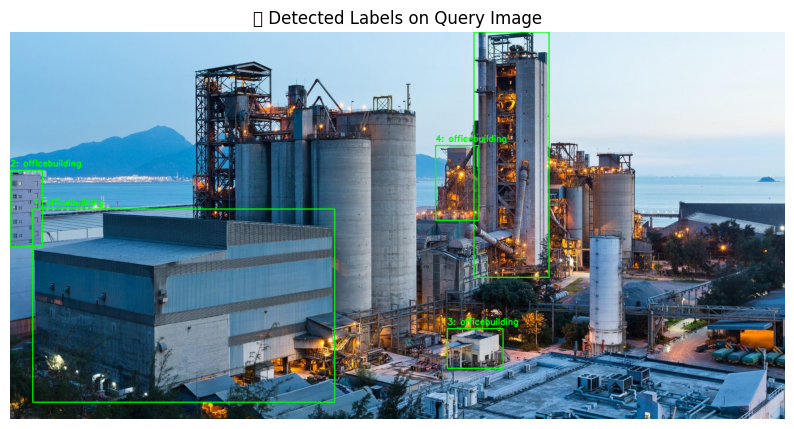


🏠 Bounding Box 1:
   🔹 File: QueryPic_crop_0.jpg
   #1: officebuilding
   #2: officebuilding
   #3: officebuilding

🏠 Bounding Box 2:
   🔹 File: QueryPic_crop_1.jpg
   #1: officebuilding
   #2: officebuilding
   #3: officebuilding

🏠 Bounding Box 3:
   🔹 File: QueryPic_crop_2.jpg
   #1: officebuilding
   #2: officebuilding
   #3: officebuilding

🏠 Bounding Box 4:
   🔹 File: QueryPic_crop_3.jpg
   #1: officebuilding
   #2: officebuilding
   #3: officebuilding

🏠 Bounding Box 5:
   🔹 File: QueryPic_crop_4.jpg
   #1: officebuilding
   #2: officebuilding
   #3: officebuilding


In [98]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# === Paths ===
QUERY_IMAGE_PATH = '/content/drive/MyDrive/DATASETS/QueryPic/Pic/QueryPic.jpg'
CSV_PATH = '/content/drive/MyDrive/DATASETS/QueryPic/Annotated_all/labels_QueryPic.jpg.csv'

# === Load original image ===
query_img = cv2.imread(QUERY_IMAGE_PATH)
query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)

# === Load CSV with bounding boxes ===
df = pd.read_csv(CSV_PATH)

# === Draw bounding boxes and predicted labels ===
for idx, match in enumerate(results):
    try:
        # Get bounding box from CSV by index
        row = df.iloc[idx]
        x1, y1, x2, y2 = int(row['x_min']), int(row['y_min']), int(row['x_max']), int(row['y_max'])

        label = match['top_k_labels'][0]  # Top-1 label

        # Draw rectangle and label
        cv2.rectangle(query_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(query_img, f"{idx+1}: {label}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    except Exception as e:
        print(f"⚠️ Failed for index {idx}: {e}")

# === Show the final image with boxes ===
plt.figure(figsize=(10, 10))
plt.imshow(query_img)
plt.axis('off')
plt.title("🏷️ Detected Labels on Query Image")
plt.show()

for idx, match in enumerate(results):
    print(f"\n🏠 Bounding Box {idx+1}:")
    print(f"   🔹 File: {match.get('query_file', 'Unknown file')}")
    for rank, label in enumerate(match.get('top_k_labels', ['No labels available']), start=1):
        print(f"   #{rank}: {label}")

In [87]:
# Print the first result structure to understand its keys
print(results[0])


{'query_file': 'QueryPic_crop_0.jpg', 'top_k_indices': array([3, 4, 6]), 'top_k_labels': ['officebuilding', 'officebuilding', 'officebuilding'], 'top_k_files': ['industrial_1838_crop_0.jpg', 'industrial_1838_crop_1.jpg', 'officebuilding_1850_crop_0.jpg'], 'top_k_paths': ['/content/drive/MyDrive/DATASETS/EACH_croped_image_perMASK/industrial_1838_crop_0.jpg', '/content/drive/MyDrive/DATASETS/EACH_croped_image_perMASK/industrial_1838_crop_1.jpg', '/content/drive/MyDrive/DATASETS/EACH_croped_image_perMASK/officebuilding_1850_crop_0.jpg']}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


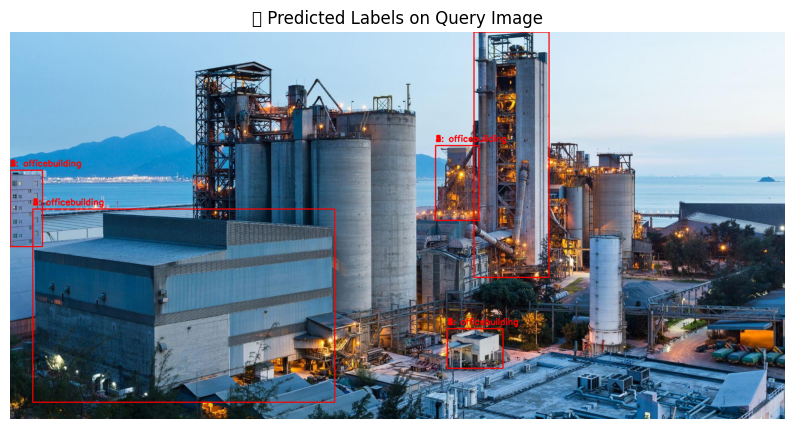

In [97]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV file
bbox_df = pd.read_csv('/content/drive/MyDrive/DATASETS/QueryPic/Annotated_all/labels_QueryPic.jpg.csv')

# Original query image path
QUERY_IMAGE_PATH = '/content/drive/MyDrive/DATASETS/QueryPic/Pic/QueryPic.jpg'
query_img = cv2.imread(QUERY_IMAGE_PATH)
query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)

# Image directory where cropped query images are located
IMAGES_DIRECTORY = '/content/drive/MyDrive/DATASETS/QueryPic/EACH_croped_image_perMASK'

# Loop through images in the query image directory
for idx, match in enumerate(results):
    file = match['query_file']  # Example: 'QueryPic_crop_0.jpg'

    # Extract bounding box information from the CSV for the current file (crop image)
    try:
        # Locate the bounding box row(s) in the CSV for the given image
        bbox_row = bbox_df[bbox_df['usage_type'] == 'Pic']  # All rows in CSV related to 'Pic'

        # Filter based on query file matching the image
        bbox_row = bbox_row[bbox_row['usage_type'] == 'Pic']
        if bbox_row.empty:
            raise ValueError(f"No bounding box found for {file} in the CSV.")

        # Loop through all rows corresponding to the current crop image
        for _, row in bbox_row.iterrows():
            x_min = row['x_min']
            y_min = row['y_min']
            x_max = row['x_max']
            y_max = row['y_max']
            label = match['top_k_labels'][0]  # Top-1 label for this image

            # Draw the bounding box on the query image
            cv2.rectangle(query_img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
            # Put the label text on the image
            cv2.putText(query_img, f"{idx+1}: {label}", (int(x_min), int(y_min)-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    except Exception as e:
        print(f"⚠️ Failed to parse bounding box from filename {file}: {e}")

# Show final image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(query_img)
plt.axis('off')
plt.title("🏷️ Predicted Labels on Query Image")
plt.show()
